In [1]:
import pandas as pd
import os
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
folder_path = 'Wine data scenario/'  
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

print(excel_files)

['Data2019.xlsx', 'Data2020.xlsx', 'Data2021.xlsx', 'Data2022.xlsx']


In [3]:
df19 = pd.read_excel('Wine data scenario/Data2019.xlsx')
df20 = pd.read_excel('Wine data scenario/Data2020.xlsx')
df21 = pd.read_excel('Wine data scenario/Data2021.xlsx')
df22 = pd.read_excel('Wine data scenario/Data2022.xlsx')

In [4]:
df19.head()

,ID,DateProduced,ResidualSugar,Chlorides,FreeSulphurDioxide,TotalSulfurDioxide,Density,Quality,pH,Sulphates,Alcohol,FixedAcidity,VolatileAcidity,CitricAcid
0,A000506,2019-01-01,3.0,0.093,16.0,112,0.9998,5,3.38,0.61,9.50,8.9,0.565,0.34
1,A001072,2019-01-02,1.8,0.078,6.0,12,0.9960,3,3.55,0.63,9.95,6.7,0.760,0.02
2,A000361,2019-01-04,2.8,0.084,23.0,43,0.9986,7,3.04,0.68,11.40,13.3,0.290,0.75
3,A000473,2019-01-04,1.8,0.222,6.0,16,0.9980,6,3.18,0.60,9.50,8.3,0.490,0.36
4,A000505,2019-01-04,2.8,0.080,21.0,84,0.9985,5,3.06,0.57,10.10,10.6,1.025,0.43


In [5]:
df19.shape, df20.shape, df21.shape, df22.shape

((287, 14), (287, 14), (273, 14), (304, 14))

In [6]:
df20.head()

,ID,DateProduced,ResidualSugar,Chlorides,FreeSulphurDioxide,TotalSulfurDioxide,Density,Quality,pH,Sulphates,Alcohol,FixedAcidity,VolatileAcidity,CitricAcid
0,A001024,43831,2.2,0.072,31,92.0,0.99566,6,3.32,0.68,11.066667,7.3,0.670,0.02
1,A000524,43832,2.1,0.112,11,22.0,0.99630,5,3.26,0.50,9.500000,7.7,0.965,0.10
2,A000061,43833,1.9,0.062,9,31.0,0.99660,5,3.39,0.64,9.600000,7.7,0.490,0.26
3,A000748,43833,2.4,0.075,6,17.0,0.99565,6,3.22,0.63,11.800000,10.2,0.290,0.65
4,A000915,43833,2.1,0.073,25,60.0,0.99638,6,3.29,0.75,10.900000,8.2,0.635,0.10


In [7]:
df21.head()

,ID,DateProduced,ResidualSugar,Chlorides,FreeSulphurDioxide,TotalSulfurDioxide,Density,Quality,pH,Sulphates,Alcohol,FixedAcidity,VolatileAcidity,CitricAcid
0,A001067,44197,2.3,0.054,7.0,16,0.99508,6,3.45,0.63,11.5,6.9,0.74,0.03
1,A000204,44198,3.4,0.102,32.0,71,1.00015,5,3.31,0.71,9.8,9.9,0.59,0.07
2,A000434,44198,2.4,0.077,18.0,29,0.99650,6,3.32,0.60,10.0,7.5,0.64,0.00
3,A000954,44202,2.6,0.077,8.0,20,0.99852,5,3.09,0.53,11.0,11.5,0.42,0.48
4,A000684,44204,2.1,0.083,35.0,72,0.99700,5,3.44,0.52,9.4,7.2,0.41,0.30


In [8]:
df22.head()


,ID,DateProduced,ResidualSugar,Chlorides,FreeSulphurDioxide,TotalSulfurDioxide,Density,Quality,pH,Sulphates,Alcohol,FixedAcidity,VolatileAcidity,CitricAcid
0,A000267,2022-01-01,6.2,0.088,6,24,0.99880,6,3.11,0.99,13.3,11.4,0.625,0.66
1,A000841,2022-01-02,1.8,0.114,15,64,0.99588,6,3.22,0.59,9.5,7.0,0.745,0.12
2,A000445,2022-01-06,2.3,0.111,20,84,0.99640,5,3.21,0.61,9.3,7.6,0.685,0.23
3,A000720,2022-01-06,2.8,0.095,17,43,0.99822,6,3.33,0.60,10.4,8.6,0.830,0.00
4,A000478,2022-01-07,2.2,0.084,7,17,0.99840,6,3.08,0.67,9.3,10.8,0.400,0.41


In [9]:
df = pd.concat([df19, df20, df21, df22], axis=0)
df.head()

,ID,DateProduced,ResidualSugar,Chlorides,FreeSulphurDioxide,TotalSulfurDioxide,Density,Quality,pH,Sulphates,Alcohol,FixedAcidity,VolatileAcidity,CitricAcid
0,A000506,2019-01-01 00:00:00,3.0,0.093,16.0,112.0,0.9998,5,3.38,0.61,9.50,8.9,0.565,0.34
1,A001072,2019-01-02 00:00:00,1.8,0.078,6.0,12.0,0.9960,3,3.55,0.63,9.95,6.7,0.760,0.02
2,A000361,2019-01-04 00:00:00,2.8,0.084,23.0,43.0,0.9986,7,3.04,0.68,11.40,13.3,0.290,0.75
3,A000473,2019-01-04 00:00:00,1.8,0.222,6.0,16.0,0.9980,6,3.18,0.60,9.50,8.3,0.490,0.36
4,A000505,2019-01-04 00:00:00,2.8,0.080,21.0,84.0,0.9985,5,3.06,0.57,10.10,10.6,1.025,0.43


In [10]:
df.shape

(1151, 14)

In [11]:
287 + 287 + 273 + 304

1151

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151 entries, 0 to 303
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1151 non-null   object 
 1   DateProduced        1151 non-null   object 
 2   ResidualSugar       1150 non-null   float64
 3   Chlorides           1151 non-null   float64
 4   FreeSulphurDioxide  1151 non-null   float64
 5   TotalSulfurDioxide  1151 non-null   float64
 6   Density             1151 non-null   float64
 7   Quality             1151 non-null   object 
 8   pH                  1151 non-null   float64
 9   Sulphates           1151 non-null   float64
 10  Alcohol             1151 non-null   float64
 11  FixedAcidity        1151 non-null   float64
 12  VolatileAcidity     1151 non-null   float64
 13  CitricAcid          1144 non-null   float64
dtypes: float64(11), object(3)
memory usage: 134.9+ KB


cleaning - to do:

* change date
* check and remove nulls
* quality and residual sugar to float
* quality replace I to 1

* check columns for unique values

In [14]:
#df['DateProduced'] = pd.to_datetime(df['DateProduced'])

In [15]:
print(df['DateProduced'].unique())

[Timestamp('2019-01-01 00:00:00') Timestamp('2019-01-02 00:00:00')
 Timestamp('2019-01-04 00:00:00') Timestamp('2019-01-05 00:00:00')
 Timestamp('2019-01-06 00:00:00') Timestamp('2019-01-07 00:00:00')
 Timestamp('2019-01-10 00:00:00') Timestamp('2019-01-11 00:00:00')
 Timestamp('2019-01-12 00:00:00') Timestamp('2019-01-14 00:00:00')
 Timestamp('2019-01-16 00:00:00') Timestamp('2019-01-17 00:00:00')
 Timestamp('2019-01-18 00:00:00') Timestamp('2019-01-19 00:00:00')
 Timestamp('2019-01-20 00:00:00') Timestamp('2019-01-22 00:00:00')
 Timestamp('2019-01-23 00:00:00') Timestamp('2019-01-26 00:00:00')
 Timestamp('2019-01-30 00:00:00') Timestamp('2019-01-31 00:00:00')
 Timestamp('2019-02-01 00:00:00') Timestamp('2019-02-02 00:00:00')
 Timestamp('2019-02-03 00:00:00') Timestamp('2019-02-04 00:00:00')
 Timestamp('2019-02-05 00:00:00') Timestamp('2019-02-06 00:00:00')
 Timestamp('2019-02-11 00:00:00') Timestamp('2019-02-12 00:00:00')
 Timestamp('2019-02-15 00:00:00') Timestamp('2019-02-16 00:00:

In [16]:
# Define a function that converts serial dates to datetime and leaves timestamps as is
def convert_serial_dates(value):
    if isinstance(value, (int, float)):  # Check if it's a serial number
        try:
            # Excel serial date starts from 1900-01-01
            return pd.Timestamp('1900-01-01') + pd.to_timedelta(value, unit='D')
        except Exception as e:
            print(f"Error converting {value}: {e}")
            return value  # If conversion fails, return the original value
    else:
        return value  # It's already a timestamp, so leave it as is

In [17]:
# Apply the function to the column
df['DateProduced'] = df['DateProduced'].apply(convert_serial_dates)

In [19]:
print(df['ResidualSugar'].unique())

[ 3.          1.8         2.8         2.7         2.4         2.
  3.8         2.9         1.7         1.9         1.5         2.5
  2.6         2.2         1.6         7.3         2.3         2.1
  3.5         5.1         4.          8.3         3.4         3.6
  4.8         1.4         4.65        1.65        5.7         8.6
  5.8                nan  3.2         3.1         4.3         5.6
  4.7         6.55        6.3         5.5         3.75        6.
  4.2         7.5         1.2         9.          8.1         1.3
 13.8         3.9         6.1         3.3         0.9         4.5
 15.5         7.9         5.9         2.85        5.4         4.1
  3.45        6.4         6.2         2.95        4.6         6.7
  2.52967657  3.7         2.25       11.          6.6        15.4
  5.          4.4         1.75        8.8         5.15        3.65
  2.05        2.15        7.2         5.2       ]


In [20]:
df.isna().sum() 

ID                    0
DateProduced          0
ResidualSugar         1
Chlorides             0
FreeSulphurDioxide    0
TotalSulfurDioxide    0
Density               0
Quality               0
pH                    0
Sulphates             0
Alcohol               0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            7
dtype: int64

In [21]:
print(df[df.isna().any(axis=1)])

          ID DateProduced  ResidualSugar  Chlorides  FreeSulphurDioxide  \
133  A000213   2019-06-13            NaN      0.073                 5.0   
280  A000037   2020-12-29            2.1      0.068                 6.0   
281  A000589   2020-12-30            2.0      0.076                15.0   
282  A001064   2020-12-30            1.9      0.089                23.0   
283  A000138   2020-12-31            1.9      0.074                21.0   
284  A000438   2020-12-31            3.4      0.076                16.0   
285  A000102   2021-01-02            2.3      0.074                12.0   
286  A000724   2021-01-02            4.1      0.095                 5.0   

     TotalSulfurDioxide  Density Quality    pH  Sulphates  Alcohol  \
133                27.0  1.00010       5  3.05       0.64      9.5   
280                14.0  0.99550       6  3.39       0.64      9.4   
281                36.0  0.99730       5  3.61       0.64      9.8   
282               147.0  0.99636       5  3.

In [22]:
df = df.dropna()
df.isna().sum() 

ID                    0
DateProduced          0
ResidualSugar         0
Chlorides             0
FreeSulphurDioxide    0
TotalSulfurDioxide    0
Density               0
Quality               0
pH                    0
Sulphates             0
Alcohol               0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 303
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  1143 non-null   object        
 1   DateProduced        1143 non-null   datetime64[ns]
 2   ResidualSugar       1143 non-null   float64       
 3   Chlorides           1143 non-null   float64       
 4   FreeSulphurDioxide  1143 non-null   float64       
 5   TotalSulfurDioxide  1143 non-null   float64       
 6   Density             1143 non-null   float64       
 7   Quality             1143 non-null   float64       
 8   pH                  1143 non-null   float64       
 9   Sulphates           1143 non-null   float64       
 10  Alcohol             1143 non-null   float64       
 11  FixedAcidity        1143 non-null   float64       
 12  VolatileAcidity     1143 non-null   float64       
 13  CitricAcid          1143 non-null   float64      

In [24]:
df['Quality'].unique()

array([5, 3, 7, 6, 0.5, 8, 'I', 4], dtype=object)

In [25]:
df['Quality'].value_counts()

5      478
6      465
7      143
4       33
8       16
3        6
0.5      1
I        1
Name: Quality, dtype: int64

In [26]:
df['Quality'] = df['Quality'].replace('I', 1)

In [27]:
print(df['ID'].unique())

['A000506' 'A001072' 'A000361' ... 'A001066' 'A000108' 'A000117']


In [28]:
df['ID'].value_counts()

A000808    9
A000652    5
A001076    1
A000332    1
A001128    1
          ..
A000401    1
A000868    1
A000512    1
A001043    1
A000117    1
Name: ID, Length: 1131, dtype: int64

## explore the data



In [30]:
df.columns

Index(['ID', 'DateProduced', 'ResidualSugar', 'Chlorides',
       'FreeSulphurDioxide', 'TotalSulfurDioxide', 'Density', 'Quality', 'pH',
       'Sulphates', 'Alcohol', 'FixedAcidity', 'VolatileAcidity',
       'CitricAcid'],
      dtype='object')

In [31]:
df.describe()

,ResidualSugar,Chlorides,FreeSulphurDioxide,TotalSulfurDioxide,Density,Quality,pH,Sulphates,Alcohol,FixedAcidity,VolatileAcidity,CitricAcid
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,2.526491,0.086848,15.621257,45.632983,0.999068,5.652231,3.311496,0.740934,10.443949,8.300262,0.528193,0.269125
std,1.352779,0.047278,10.218581,32.606894,0.062339,0.830679,0.156359,2.766157,1.078917,1.768024,0.181533,0.195876
min,0.900000,0.012000,1.000000,6.000000,0.990070,0.500000,2.740000,0.330000,8.400000,0.000000,0.000000,0.000000
25%,1.900000,0.070000,7.000000,21.000000,0.995570,5.000000,3.200000,0.550000,9.500000,7.100000,0.390000,0.090000
50%,2.200000,0.079000,13.000000,37.000000,0.996700,6.000000,3.310000,0.620000,10.200000,7.900000,0.520000,0.260000
75%,2.600000,0.090000,21.000000,61.000000,0.997835,6.000000,3.400000,0.730000,11.150000,9.100000,0.640000,0.420000
max,15.500000,0.611000,68.000000,289.000000,2.990000,8.000000,4.010000,94.000000,14.900000,15.900000,1.580000,1.000000


In [32]:
df.var()

C:\Users\emcknight\AppData\Local\Temp\ipykernel_38228\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


ResidualSugar            1.830010
Chlorides                0.002235
FreeSulphurDioxide     104.419399
TotalSulfurDioxide    1063.209533
Density                  0.003886
Quality                  0.690028
pH                       0.024448
Sulphates                7.651622
Alcohol                  1.164063
FixedAcidity             3.125911
VolatileAcidity          0.032954
CitricAcid               0.038368
dtype: float64

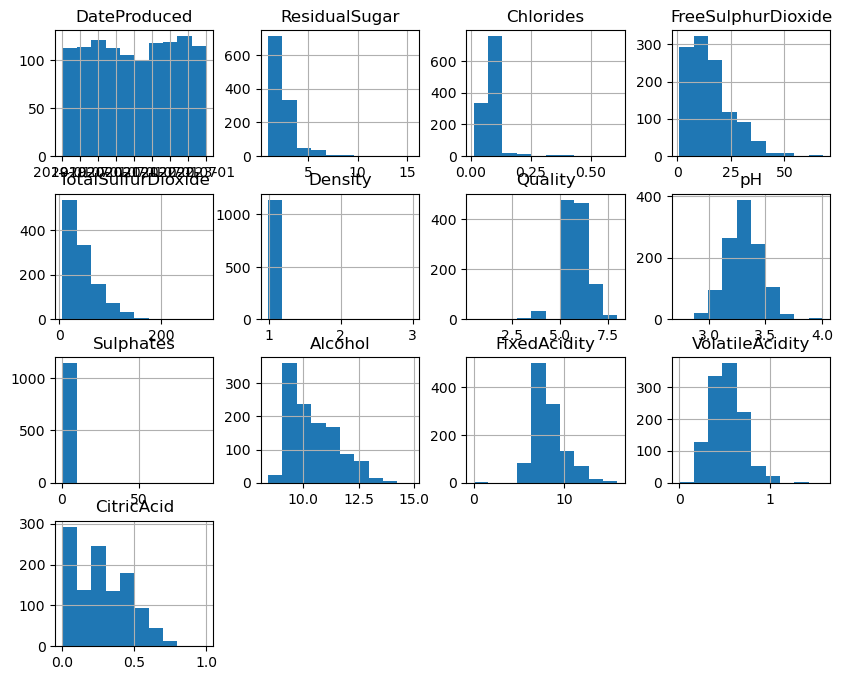

In [33]:
df.hist(bins=10, figsize=(10, 8))
plt.show()

In [34]:
col = ['ResidualSugar', 'Chlorides',
       'FreeSulphurDioxide', 'TotalSulfurDioxide', 'Density', 'Quality', 'pH',
       'Sulphates', 'Alcohol', 'FixedAcidity', 'VolatileAcidity',
       'CitricAcid']

df2 = df.drop(df.columns.difference(col), axis=1)

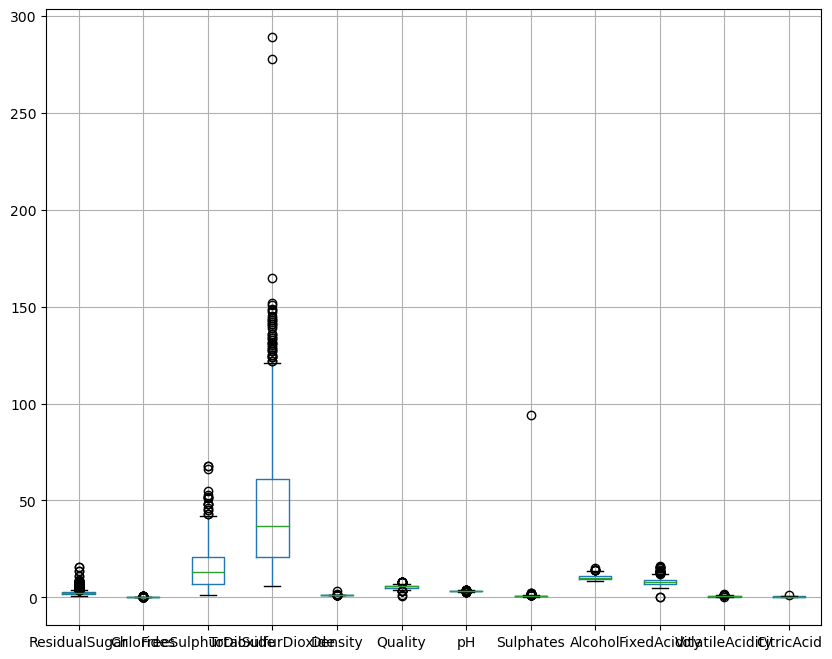

In [35]:
df2.boxplot(figsize=(10, 8))
plt.show()

In [36]:
cols = ['ResidualSugar',
       'Sulphates', 'Alcohol']

df3 = df.drop(df.columns.difference(cols), axis=1)

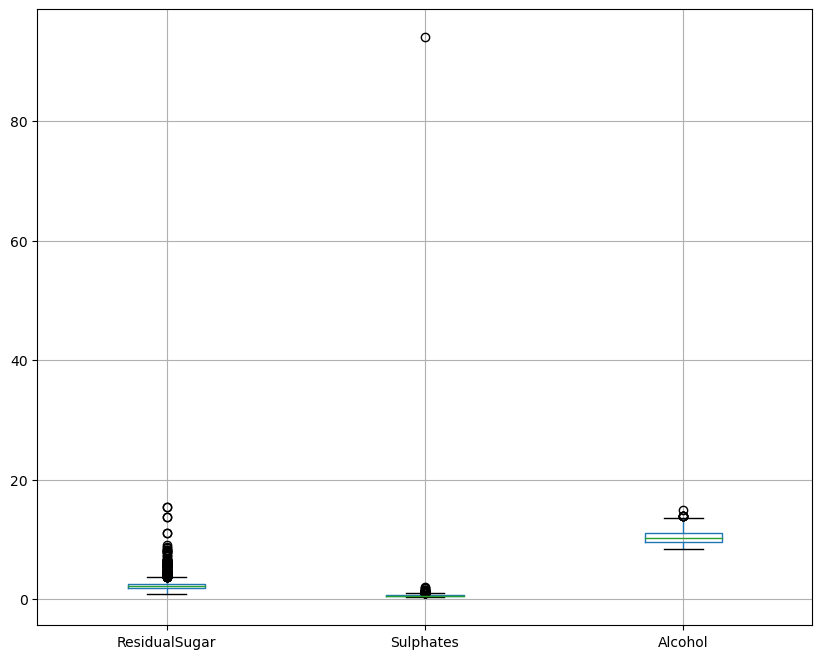

In [37]:
df3.boxplot(figsize=(10, 8))
plt.show()

<Axes: ylabel='ResidualSugar'>

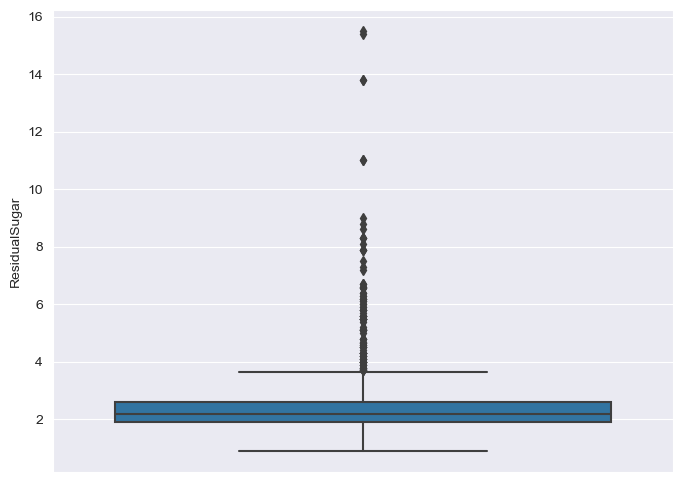

In [38]:
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

sns.boxplot(y='ResidualSugar', data=df)

In [39]:
IQR = df["ResidualSugar"].quantile(0.75) - df["ResidualSugar"].quantile(0.25)

lower = df["ResidualSugar"].quantile(0.25) - (IQR * 1.5)
upper = df["ResidualSugar"].quantile(0.75) + (IQR * 1.5)

print(lower)
print(upper)

0.8499999999999996
3.6500000000000004


<Axes: ylabel='Sulphates'>

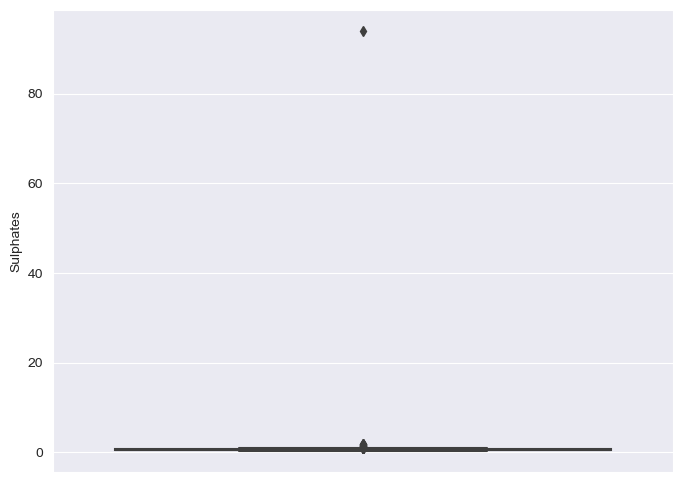

In [40]:
sns.boxplot(y='Sulphates', data=df)

In [41]:
IQR = df["Sulphates"].quantile(0.75) - df["Sulphates"].quantile(0.25)

lower = df["Sulphates"].quantile(0.25) - (IQR * 1.5)
upper = df["Sulphates"].quantile(0.75) + (IQR * 1.5)

print(lower)
print(upper)

0.28000000000000014
0.9999999999999999


In [42]:
sul_outliers = np.where(df["Sulphates"] > upper, True,
                       np.where(df["Sulphates"] < lower, True, False))

In [43]:
sul_without_outliers = df.loc[~(sul_outliers), ]

df.shape, sul_without_outliers.shape

((1143, 14), (1099, 14))

<Axes: ylabel='Sulphates'>

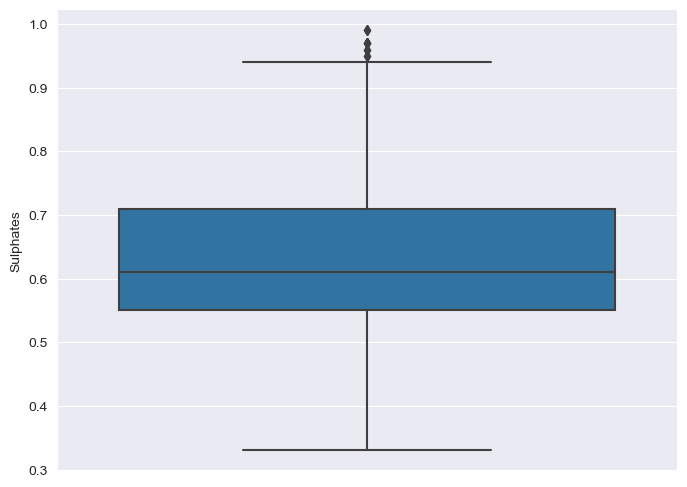

In [44]:
sns.boxplot( y='Sulphates', data = sul_without_outliers)

<Axes: ylabel='Alcohol'>

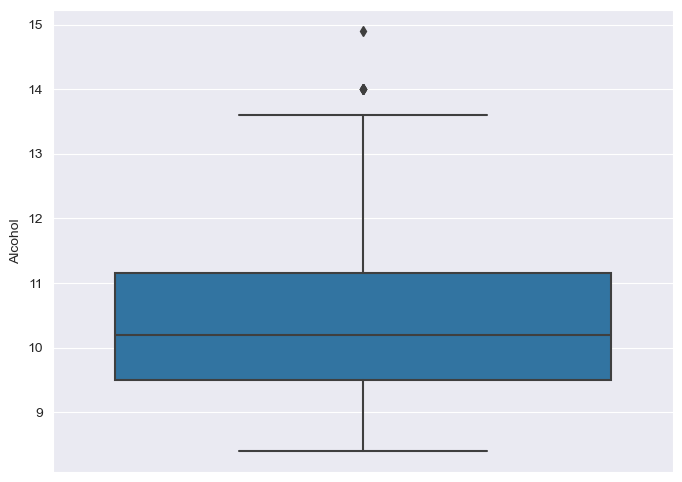

In [45]:
sns.boxplot(y='Alcohol', data=df)

In [46]:
df.columns

Index(['ID', 'DateProduced', 'ResidualSugar', 'Chlorides',
       'FreeSulphurDioxide', 'TotalSulfurDioxide', 'Density', 'Quality', 'pH',
       'Sulphates', 'Alcohol', 'FixedAcidity', 'VolatileAcidity',
       'CitricAcid'],
      dtype='object')

<Axes: xlabel='DateProduced', ylabel='Alcohol'>

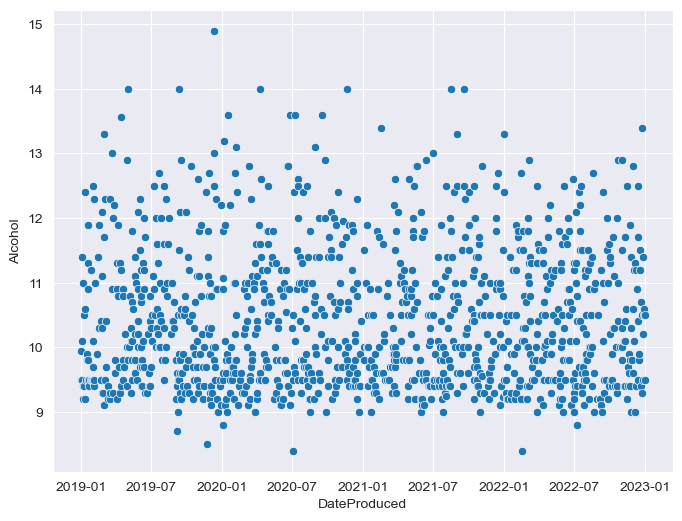

In [47]:
# Make the plot (using Seaborn)
sns.scatterplot(data=df,
                       x='DateProduced',
                       y='Alcohol')

In [48]:
df['Year'] = df['DateProduced'].dt.year
df['Month'] = df['DateProduced'].dt.month
df['Day'] = df['DateProduced'].dt.day

In [49]:
df.head(4)

,ID,DateProduced,ResidualSugar,Chlorides,FreeSulphurDioxide,TotalSulfurDioxide,Density,Quality,pH,Sulphates,Alcohol,FixedAcidity,VolatileAcidity,CitricAcid,Year,Month,Day
0,A000506,2019-01-01,3.0,0.093,16.0,112.0,0.9998,5.0,3.38,0.61,9.50,8.9,0.565,0.34,2019,1,1
1,A001072,2019-01-02,1.8,0.078,6.0,12.0,0.9960,3.0,3.55,0.63,9.95,6.7,0.760,0.02,2019,1,2
2,A000361,2019-01-04,2.8,0.084,23.0,43.0,0.9986,7.0,3.04,0.68,11.40,13.3,0.290,0.75,2019,1,4
3,A000473,2019-01-04,1.8,0.222,6.0,16.0,0.9980,6.0,3.18,0.60,9.50,8.3,0.490,0.36,2019,1,4


In [50]:
dfgroup = df.groupby(['Year', 'Month'])['Alcohol'].sum().round()
dfgroup.head(2)

Year  Month
2019  1        340.0
      2        207.0
Name: Alcohol, dtype: float64

In [51]:
dfgroup.info()

<class 'pandas.core.series.Series'>
MultiIndex: 48 entries, (2019, 1) to (2022, 12)
Series name: Alcohol
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 715.0 bytes


In [52]:
dfgroup = dfgroup.reset_index()

In [53]:
dfgroup.head(2)

,Year,Month,Alcohol
0,2019,1,340.0
1,2019,2,207.0


In [54]:
dfgroup['Year-Month'] = dfgroup['Year'].astype(str) + '-' + dfgroup['Month'].astype(str)

In [55]:
dfgroup.head(2)

,Year,Month,Alcohol,Year-Month
0,2019,1,340.0,2019-1
1,2019,2,207.0,2019-2


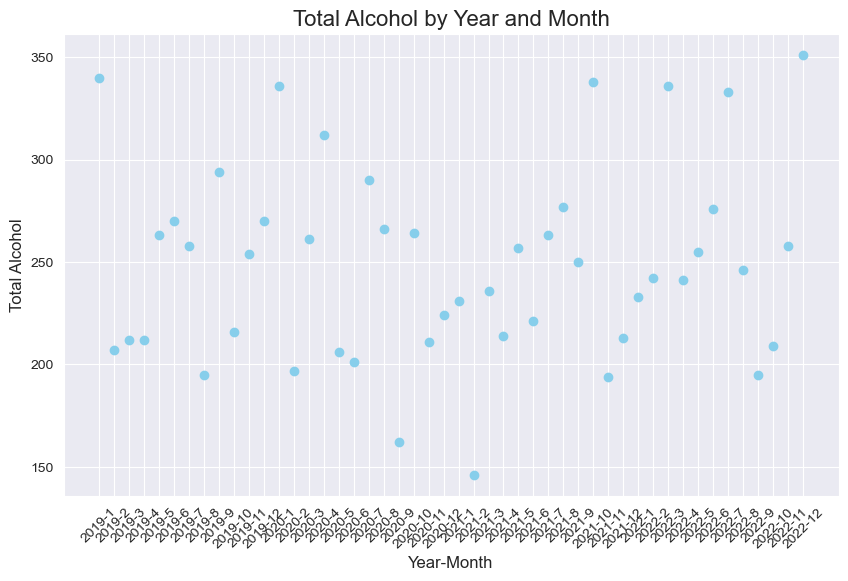

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(dfgroup['Year-Month'], dfgroup['Alcohol'], color='skyblue')

# Add labels and title to the plot
plt.title('Total Alcohol by Year and Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Alcohol', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

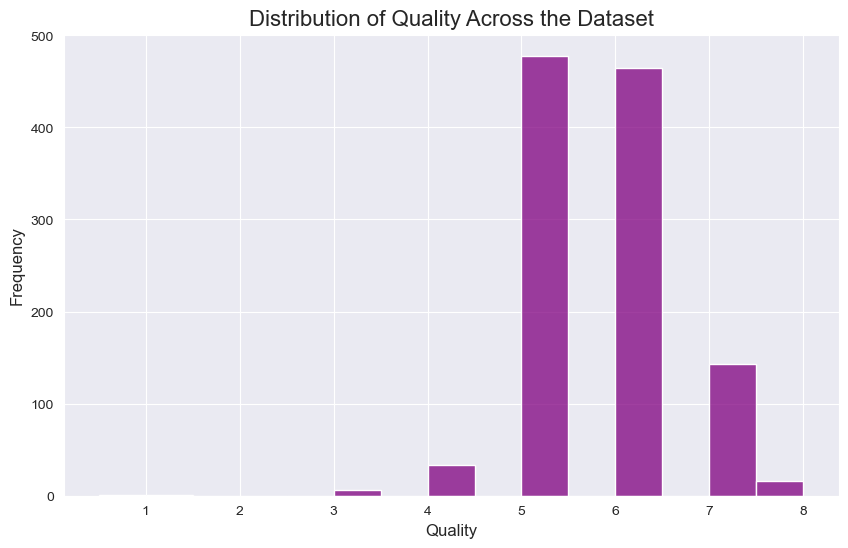

Average Quality across the dataset: 5.65


In [57]:
# Plotting the histogram for the distribution of Quality
plt.figure(figsize=(10, 6))
sns.histplot(df['Quality'], color='purple', bins=15)

# Add labels and title
plt.title('Distribution of Quality Across the Dataset', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

# Calculate the mean quality across the dataset
mean_quality = df['Quality'].mean()
print(f"Average Quality across the dataset: {mean_quality:.2f}")

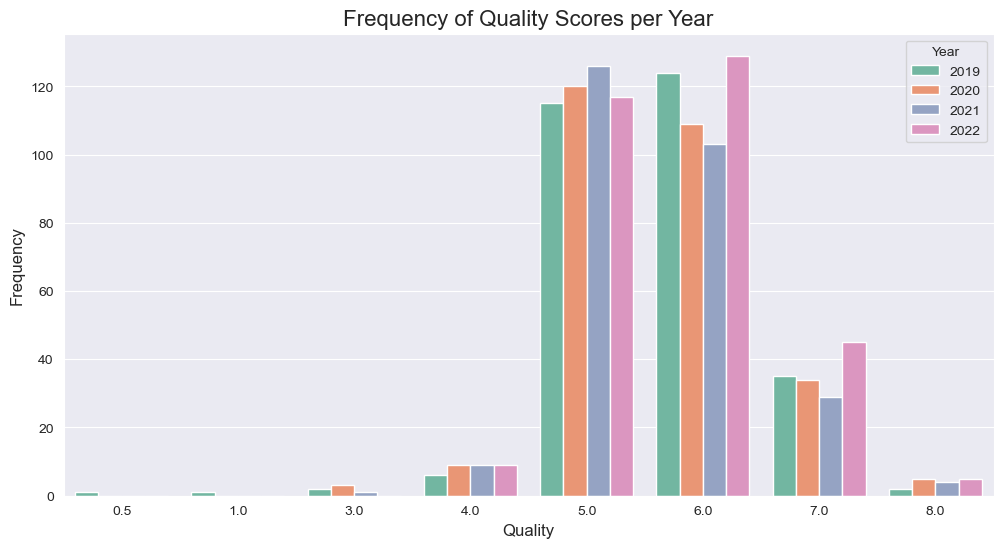

In [58]:
# Create a countplot for the frequency of each quality score per year
plt.figure(figsize=(12, 6))
sns.countplot(x='Quality', hue='Year', data=df, palette='Set2')

# Add labels and title
plt.title('Frequency of Quality Scores per Year', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

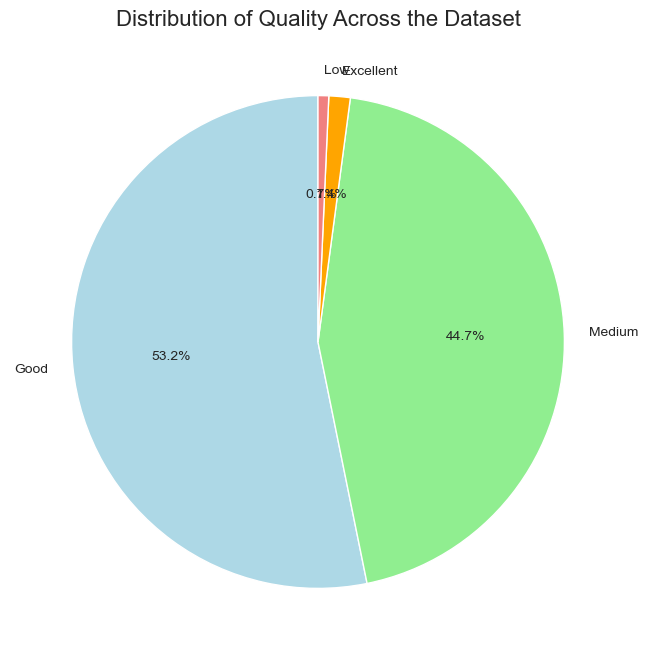

In [59]:
# Define bins for the quality scores (you can adjust these thresholds as needed)
bins = [0, 4, 6, 8, 10]  # Defining bins: (0-4) = Low, (4-6) = Medium, (6-8) = Good, (8-10) = Excellent
labels = ['Low', 'Medium', 'Good', 'Excellent']

# Assign the quality values to the corresponding bins
df['Quality_Category'] = pd.cut(df['Quality'], bins=bins, labels=labels, right=False)

# Count the frequency of each quality category
quality_counts = df['Quality_Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'lightcoral'])

# Title
plt.title('Distribution of Quality Across the Dataset', fontsize=16)

# Show the plot
plt.show()

In [60]:
# dividing data into features and labels
features = df2.drop(["Quality"], axis = 1)#1 for dropping columns
labels = df2.filter(["Quality"], axis = 1)

In [61]:
features.var()

ResidualSugar            1.830010
Chlorides                0.002235
FreeSulphurDioxide     104.419399
TotalSulfurDioxide    1063.209533
Density                  0.003886
pH                       0.024448
Sulphates                7.651622
Alcohol                  1.164063
FixedAcidity             3.125911
VolatileAcidity          0.032954
CitricAcid               0.038368
dtype: float64

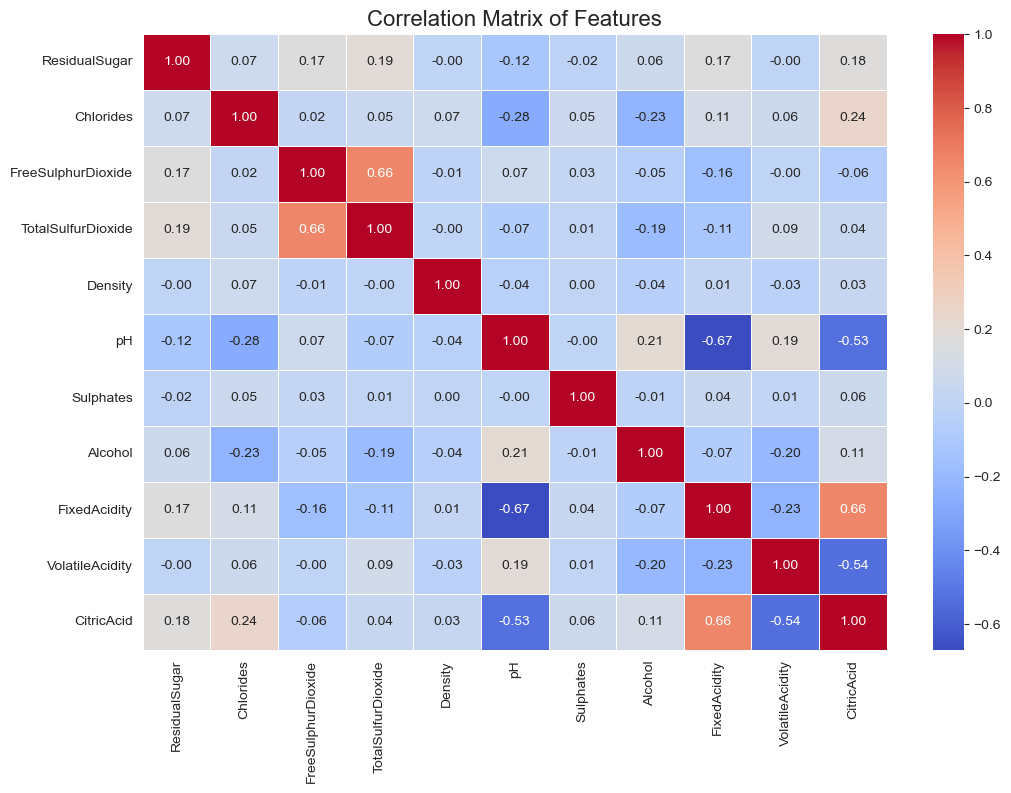

In [62]:
# Compute the correlation matrix
correlation_matrix = features.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

In [63]:
# Create an empty set to store correlated features
correlated_features_matrix = set()

# Iterate over the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Check if correlation is greater than 0.6 or less than -0.6
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            corr_col1 = correlation_matrix.columns[i]
            corr_col2 = correlation_matrix.columns[j]
            # Add both correlated columns to the set
            correlated_features_matrix.add(corr_col1)
            correlated_features_matrix.add(corr_col2)

# Display the correlated features
print(correlated_features_matrix)

{'FixedAcidity', 'TotalSulfurDioxide', 'FreeSulphurDioxide', 'CitricAcid', 'pH'}


In [64]:
print(correlated_features_matrix)

{'FixedAcidity', 'TotalSulfurDioxide', 'FreeSulphurDioxide', 'CitricAcid', 'pH'}


# Now with the features to drop I have returned to the original and clean data df2 to drop the columns

In [ ]:
filtered_dataset = df2.drop(correlated_features_matrix, axis = 1)

In [82]:
# Replace 'column_name' with the name of the column you want to move
column_name = 'Quality'

# Reorder columns to have 'column_name' first
cols = [column_name] + [col for col in filtered_dataset.columns if col != column_name]
filtered_dataset = filtered_dataset[cols]

In [83]:
filtered_dataset.head()

,Quality,ResidualSugar,Chlorides,Density,Sulphates,Alcohol,VolatileAcidity
0,5.0,3.0,0.093,0.9998,0.61,9.50,0.565
1,3.0,1.8,0.078,0.9960,0.63,9.95,0.760
2,7.0,2.8,0.084,0.9986,0.68,11.40,0.290
3,6.0,1.8,0.222,0.9980,0.60,9.50,0.490
4,5.0,2.8,0.080,0.9985,0.57,10.10,1.025


<Axes: >

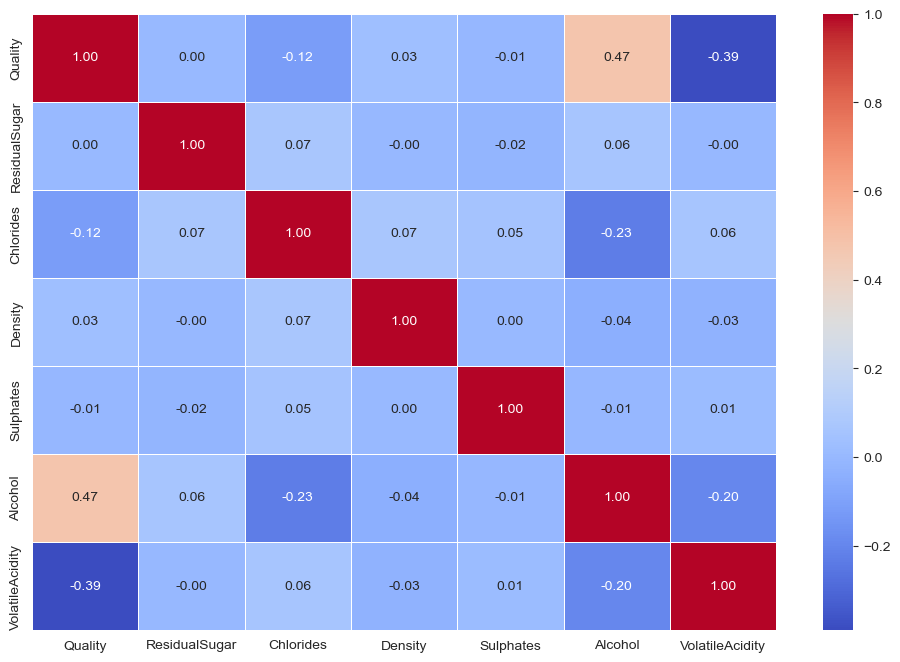

In [84]:
# Compute the correlation matrix
correlation_matrix = filtered_dataset.corr()


# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

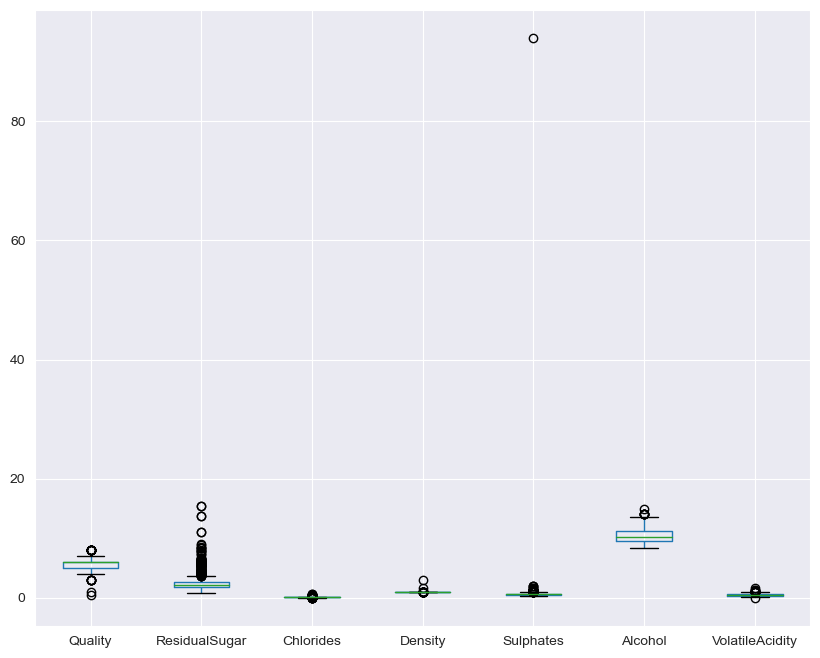

In [85]:
filtered_dataset.boxplot(figsize=(10, 8))
plt.show()

In [86]:
def remove_outliers_iqr(df, multiplier=1.5):
    # Work only on numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    clean_df = df.copy()
    
    for col in numeric_cols:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - (IQR * multiplier)
        upper = Q3 + (IQR * multiplier)
        
        # Keep only rows where the column value is within the IQR bounds
        clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]
    
    return clean_df

In [87]:
df_cleaned = remove_outliers_iqr(filtered_dataset)

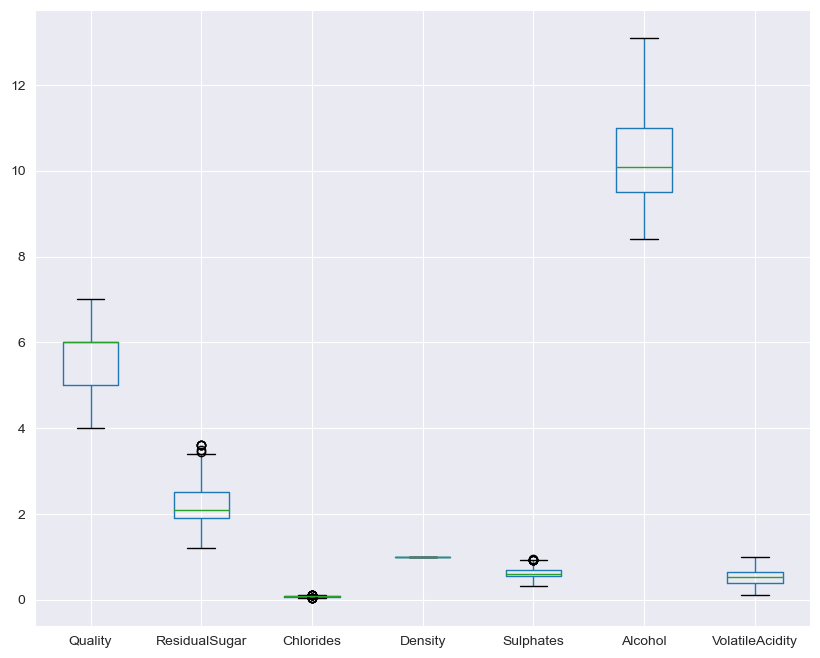

In [88]:
df_cleaned.boxplot(figsize=(10, 8))
plt.show()

<Axes: >

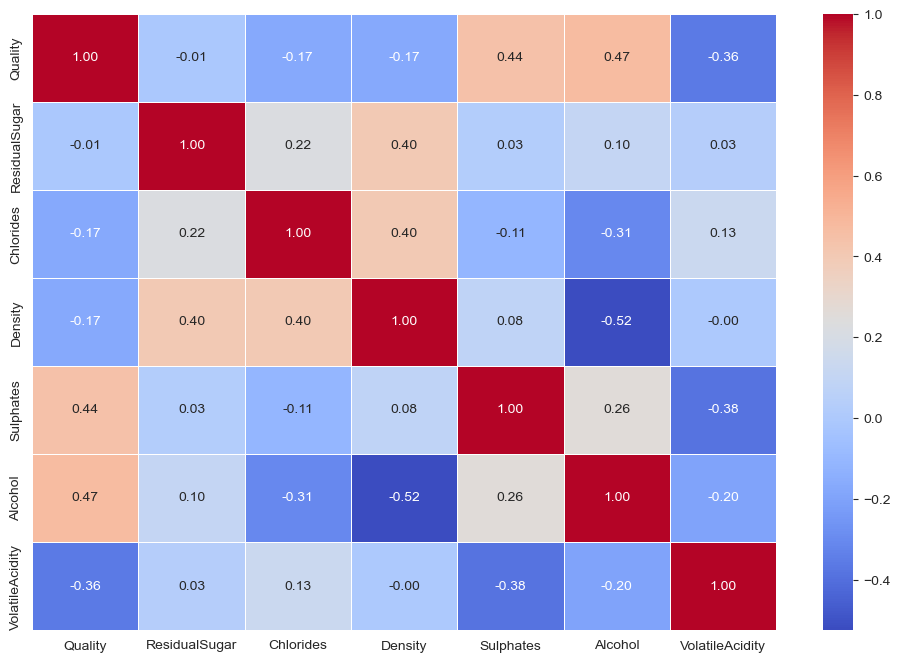

In [89]:
# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()


# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

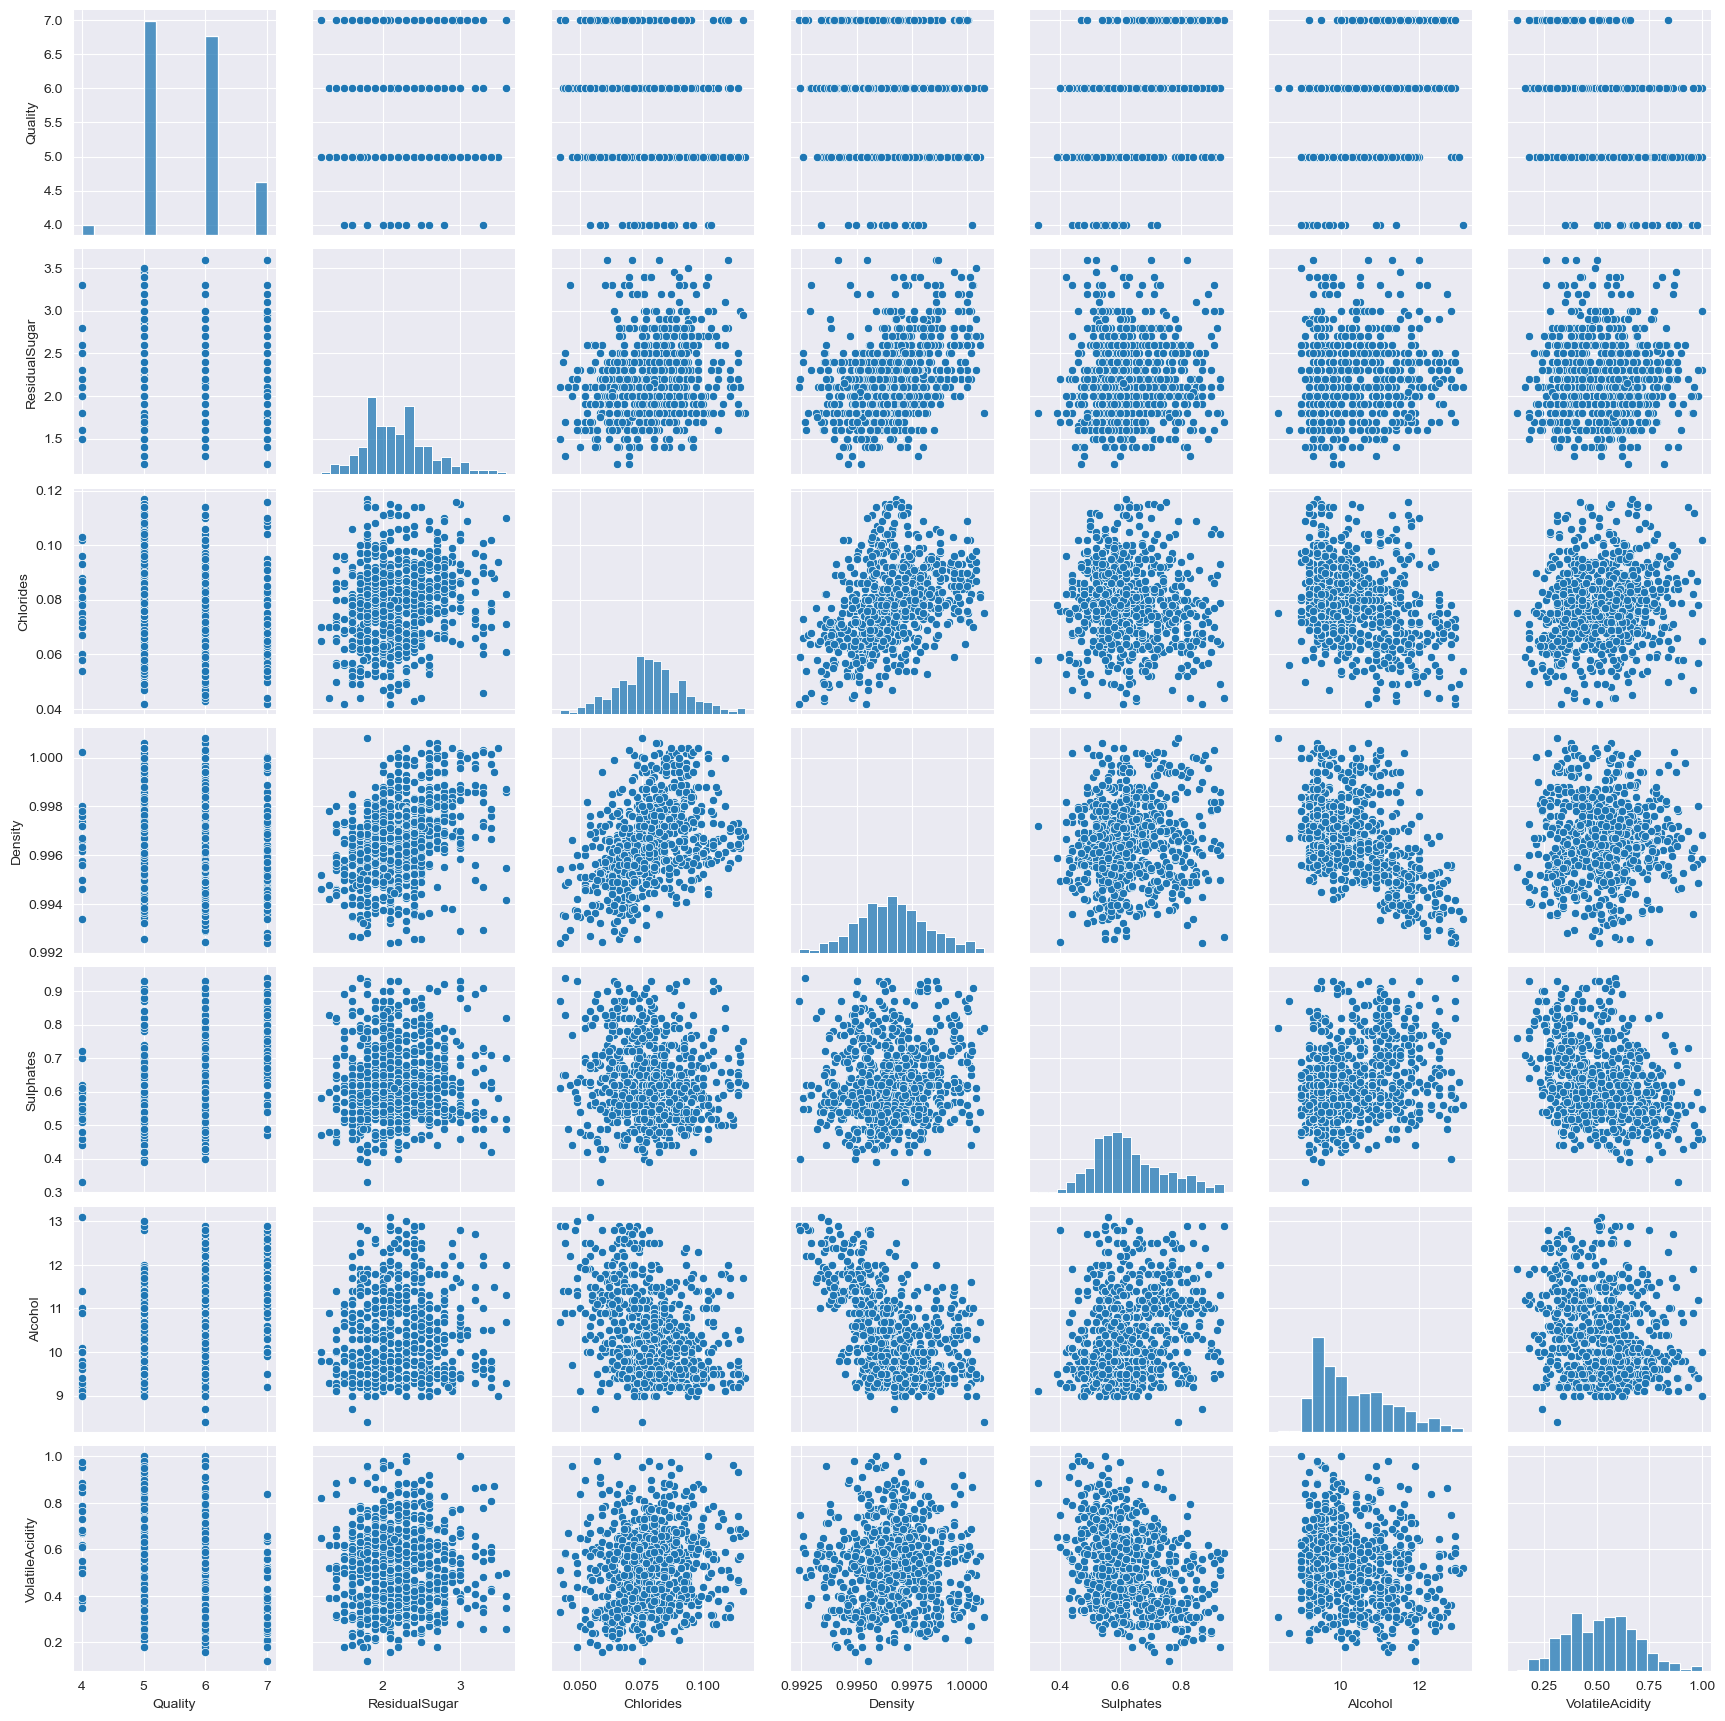

In [90]:
# Create a pairplot for all numeric columns in the DataFrame
sns.pairplot(df_cleaned)

# Show the plot
plt.show()

In [93]:
features = df_cleaned.drop(["Quality"], axis = 1)
labels = df_cleaned['Quality']

In [98]:
# 2. Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 3. Create a linear regression model
model = LinearRegression()

# 4. Train (fit) the model
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 7. View model coefficients
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
})
print(coefficients)

# 8. Optional: View model intercept
print(f"Intercept: {model.intercept_}")

Mean Squared Error (MSE): 0.29
R-squared (R²): 0.43
           Feature  Coefficient
0    ResidualSugar    -0.131310
1        Chlorides     0.477039
2          Density    24.579864
3        Sulphates     1.637179
4          Alcohol     0.291072
5  VolatileAcidity    -0.725643
Intercept: -22.28092187002946


In [100]:
# OLS does not generate a constant, so we will add a constat to the X data frame
features = sm.add_constant(features)

In [101]:
features

,const,ResidualSugar,Chlorides,Density,Sulphates,Alcohol,VolatileAcidity
0,1.0,3.0,0.093,0.99980,0.61,9.5,0.565
2,1.0,2.8,0.084,0.99860,0.68,11.4,0.290
5,1.0,2.7,0.084,0.99840,0.61,9.4,0.470
6,1.0,2.4,0.094,0.99612,0.58,11.0,0.640
7,1.0,2.0,0.082,0.99640,0.59,9.4,0.340
...,...,...,...,...,...,...,...
298,1.0,2.4,0.065,0.99492,0.85,11.4,0.310
299,1.0,2.3,0.063,0.99613,0.53,10.2,0.440
300,1.0,1.8,0.065,0.99620,0.92,10.5,0.590
301,1.0,1.9,0.080,0.99492,0.81,10.6,0.430


In [102]:
# fit the OLS model to the data
result = sm.OLS(labels, features).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     83.47
Date:                Sun, 04 May 2025   Prob (F-statistic):           1.36e-82
Time:                        18:41:36   Log-Likelihood:                -746.55
No. Observations:                 881   AIC:                             1507.
Df Residuals:                     874   BIC:                             1541.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -16.9613     17.664     

In [103]:
features.columns

Index(['const', 'ResidualSugar', 'Chlorides', 'Density', 'Sulphates',
       'Alcohol', 'VolatileAcidity'],
      dtype='object')

In [107]:
featuresfiltered = features.copy()

cols = ['Chlorides', 'Density', 'ResidualSugar']

featuresfiltered = featuresfiltered.drop(cols, axis = 1)

In [108]:
featuresfiltered.head()

,const,Sulphates,Alcohol,VolatileAcidity
0,1.0,0.61,9.5,0.565
2,1.0,0.68,11.4,0.290
5,1.0,0.61,9.4,0.470
6,1.0,0.58,11.0,0.640
7,1.0,0.59,9.4,0.340


In [109]:
# fit the OLS model to the data
result = sm.OLS(labels, featuresfiltered).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sun, 04 May 2025   Prob (F-statistic):           7.31e-85
Time:                        18:48:56   Log-Likelihood:                -748.82
No. Observations:                 881   AIC:                             1506.
Df Residuals:                     877   BIC:                             1525.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.1455      0.251     

In [111]:
featuresfiltered.columns

Index(['const', 'Sulphates', 'Alcohol', 'VolatileAcidity'], dtype='object')

In [112]:
df_cleaned.columns

Index(['Quality', 'ResidualSugar', 'Chlorides', 'Density', 'Sulphates',
       'Alcohol', 'VolatileAcidity'],
      dtype='object')

In [113]:
df_cleanedfiltered = df_cleaned.copy()

cols = ['ResidualSugar', 'Chlorides', 'Density']

df_cleanedfiltered = df_cleanedfiltered.drop(cols, axis = 1)

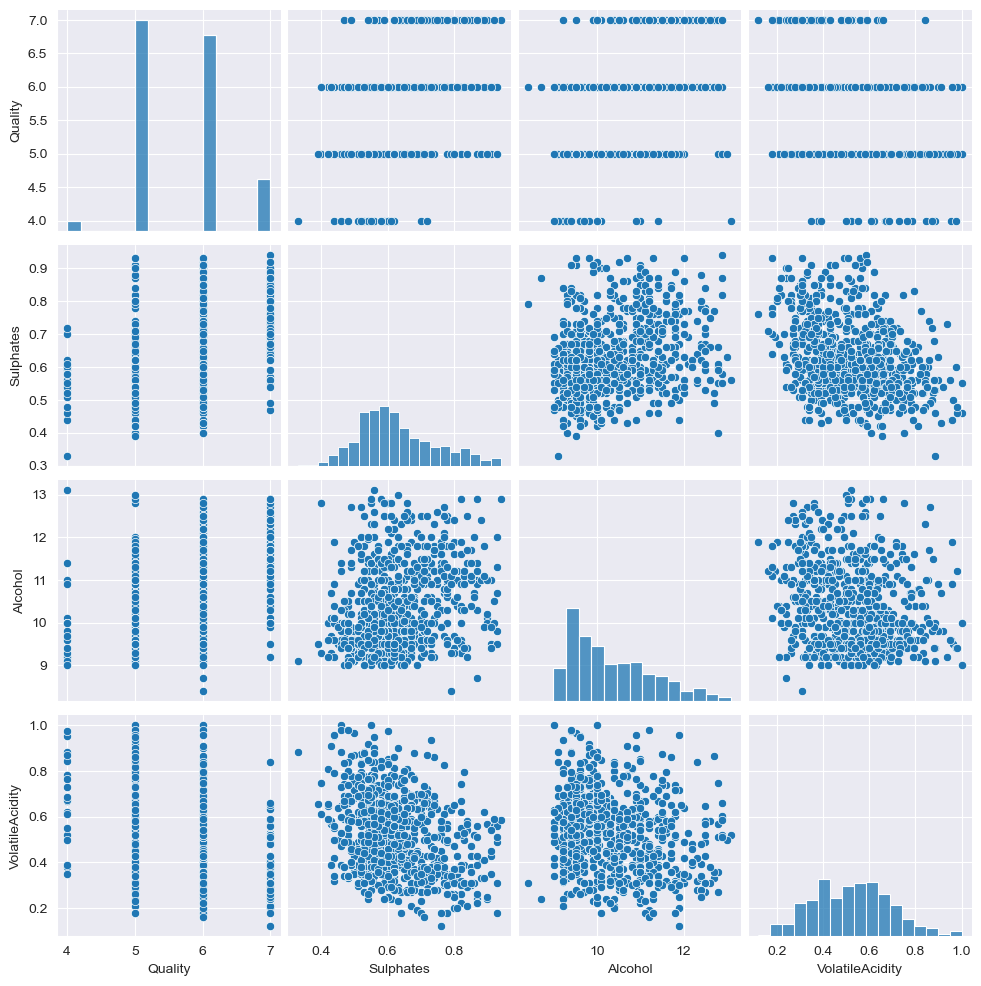

In [114]:
sns.pairplot(df_cleanedfiltered)

# Show the plot
plt.show()